In [1]:
# This step is importing all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Green House Gass (GHG) Historical emmisions csv
df_GHG = pd.read_csv("ALL GHG_historical_emissions.csv")

In [3]:
# Import C02 Per Cap data
df_C02PerCap = pd.read_csv("C02_Per_Cap.csv")

In [4]:
# Print first few rows of GHG data to review dataset
print(df_GHG.head())

               Country Data source                Sector      Gas    Unit  \
0                World        CAIT  Total including LUCF  All GHG  MtCO₂e   
1                China        CAIT  Total including LUCF  All GHG  MtCO₂e   
2        United States        CAIT  Total including LUCF  All GHG  MtCO₂e   
3                India        CAIT  Total including LUCF  All GHG  MtCO₂e   
4  European Union (27)        CAIT  Total including LUCF  All GHG  MtCO₂e   

       2018      2017      2016      2015      2014  ...      1999      1998  \
0  48939.71  47990.47  47413.95  46760.47  46647.29  ...  34948.94  34929.19   
1  11705.81  11408.26  11207.66  11149.68  11155.76  ...   4053.37   4103.23   
2   5794.35   5613.64   5676.92   5586.69   5711.15  ...   6291.25   6293.80   
3   3346.63   3202.82   3073.24   3002.17   2988.34  ...   1460.24   1382.26   
4   3333.16   3401.95   3387.97   3046.38   2990.49  ...   3934.85   4008.29   

       1997      1996      1995      1994      1993     

In [5]:
# Rework data set to a more user freiendy layout, remove coulmns that I was not going to use
df_GHG = df_GHG.drop(["Data source", "Sector", "Gas", "Unit"], axis = 1)
df_GHG.rename(columns={"Country":"Year"}, inplace=True)
df_GHG = df_GHG.set_index("Year").T
df_GHG = df_GHG.sort_index()

In [6]:
# Print list of columns containing incomplete data for review
Incomplete_Columns_GHG = df_GHG.columns[df_GHG.isnull().any()].tolist()
print(Incomplete_Columns_GHG)

['Namibia', 'Palau', 'Micronesia', 'Marshall Islands']


In [7]:
# Each column that contains incomplete data is not considered material for this project and deleted
df_GHG = df_GHG.drop(Incomplete_Columns_GHG, axis = 1)

In [8]:
# Print first few rows of Updated GHG data to review dataset
print(df_GHG.head())

Year     World    China  United States    India  European Union (27)   Russia  \
1990  32645.91  2873.71        5543.47  1009.44              4279.18  2885.12   
1991  32813.46  3023.38        5501.92  1064.49              4202.13  2788.70   
1992  32670.32  3154.54        5583.80  1096.71              4058.11  2551.94   
1993  32766.49  3377.79        5691.26  1128.44              3984.95  2294.62   
1994  32977.47  3528.81        5782.20  1174.78              3968.32  2011.47   

Year  Indonesia   Brazil    Japan    Iran  ...  \
1990    1257.10  1642.29  1109.37  240.54  ...   
1991    1274.43  1669.56  1123.86  280.88  ...   
1992    1295.01  1679.50  1137.15  301.84  ...   
1993    1311.27  1689.70  1129.63  300.14  ...   
1994    1327.87  1706.03  1186.79  332.67  ...   

Year  Saint Vincent and the Grenadines  Tonga  Fiji  Dominica  Liechtenstein  \
1990                              0.11   0.25 -0.72      0.24           0.25   
1991                              0.11   0.27 -0.70 

In [9]:
# Print first few rows of C02 Per Cap data to review dataset
print(df_C02PerCap.head())

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                           Indicator Name  Indicator Code      1960      1961  \
0  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC       NaN       NaN   
1  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  0.906060  0.922474   
2  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  0.046057  0.053589   
3  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  0.090880  0.095283   
4  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  0.100835  0.082204   

       1962      1963      1964      1965  ...      2011      2012      2013  \
0       NaN       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1  0.930816  0.940570  0.996033  1.047280  ...  1.005338  1.021646  1.

In [10]:
# The C02 per Capita data frame has more years then the GHG dataframe, therefore I will remove them using a list
Years_Not_Needed = list(range(1960, 1990, 1))+[2019, 2020]
Years_Not_Needed_STR = [str(x) for x in Years_Not_Needed]


# I will make a full list of all columns not required and remove them
Total_Columns_Removed = Years_Not_Needed_STR + ["Country Code", "Indicator Name", "Indicator Code"]
df_C02PerCap = df_C02PerCap.drop(Total_Columns_Removed, axis = 1)


# Rework data set for more user friendly format
df_C02PerCap.rename(columns={'Country Name':'Year'}, inplace=True)
df_C02PerCap = df_C02PerCap.set_index('Year').T

In [11]:
# Print list of columns containing incomplete data for review
Incomplete_Columns_PerCAP = df_C02PerCap.columns[df_C02PerCap.isnull().any()].tolist()
print(Incomplete_Columns_PerCAP)

['Aruba', 'American Samoa', 'Bermuda', 'Channel Islands', 'Curacao', 'Cayman Islands', 'Faroe Islands', 'Gibraltar', 'Greenland', 'Guam', 'Hong Kong SAR, China', 'Isle of Man', 'Not classified', 'Kuwait', 'Macao SAR, China', 'St. Martin (French part)', 'Monaco', 'Northern Mariana Islands', 'Namibia', 'New Caledonia', 'Puerto Rico', 'West Bank and Gaza', 'French Polynesia', 'San Marino', 'Sint Maarten (Dutch part)', 'Turks and Caicos Islands', 'British Virgin Islands', 'Virgin Islands (U.S.)', 'Kosovo']


In [12]:
# Each column that contains incomplete data is not considered material for this project and deleted
df_C02PerCap = df_C02PerCap.drop(Incomplete_Columns_PerCAP, axis = 1)

In [13]:
# Print first few rows of C02 per Cap data to review dataset
print(df_C02PerCap.head())

Year  Africa Eastern and Southern  Afghanistan  Africa Western and Central  \
1990                     1.017505     0.238473                    0.440470   
1991                     0.971324     0.206030                    0.474868   
1992                     0.931920     0.098719                    0.516677   
1993                     0.925465     0.085986                    0.518952   
1994                     0.918612     0.076131                    0.492858   

Year    Angola   Albania   Andorra  Arab World  United Arab Emirates  \
1990  0.534250  1.840841  7.521832    2.870779             30.299102   
1991  0.533109  1.258116  7.235379    2.912911             31.747523   
1992  0.503264  0.689859  6.963079    2.959286             29.051699   
1993  0.527723  0.641406  6.724178    3.082222             28.599236   
1994  0.495418  0.667179  6.541579    3.166690             29.764071   

Year  Argentina   Armenia  ...  St. Vincent and the Grenadines  Venezuela, RB  \
1990   3.060826  

<AxesSubplot:title={'center':'Yearly Green house gass emissions 1990 to 2018'}, xlabel='Years', ylabel='GHG emissions (Metric tons of C02 equivalent)'>

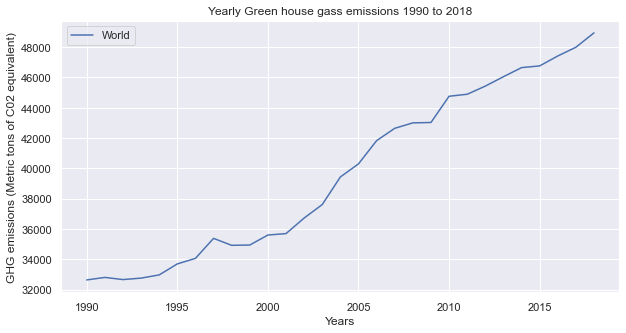

In [14]:
# Set universal format for graphs and plot the world GHG Emissions
sns.set(rc={'figure.figsize':(10,5)}) # size necessary change for top 10 bar chart, names overlapped

df_GHG.plot(y='World', xlabel ="Years", ylabel = "GHG emissions (Metric tons of C02 equivalent)", title ='Yearly Green house gass emissions 1990 to 2018')

In [15]:
# Looking at the above graph we can clearly see the World GHG Emissions have increased pretty much every year. This might not be deemed a fare judgement as the population have also increase.

<AxesSubplot:title={'center':'World CO2 emissions per capita 1990 to 2018'}, xlabel='Years', ylabel='CO2 emissions (metric tons per capita)'>

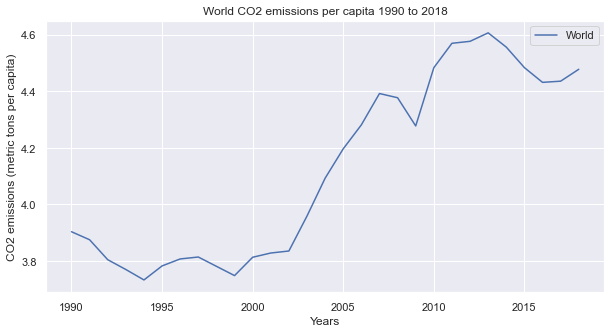

In [16]:
# Graph of world trend in C02 emissions per capita

df_C02PerCap.plot(y='World', xlabel ="Years", ylabel = "CO2 emissions (metric tons per capita)", title ='World CO2 emissions per capita 1990 to 2018')

In [17]:
# Looking at the above graph we can clearly see the world C02 Emissions per capital have an increasing trend, but do not increase each year. There are some years with decreases.

In [18]:
# For more detail let’s look at the top 10 countries that produced the most GHG in 2018.
# List of 12 retrieved as some items will not be countries

Top_10_GHG = pd.DataFrame(df_GHG.T["2018"].nlargest(12).index).T
Top_10_GHG = Top_10_GHG.values.tolist()
Top_10_GHG = [Top_10_GHG for sublist in Top_10_GHG for Top_10_GHG in sublist]

print(Top_10_GHG)

['World', 'China', 'United States', 'India', 'European Union (27)', 'Russia', 'Indonesia', 'Brazil', 'Japan', 'Iran', 'Germany', 'Canada']


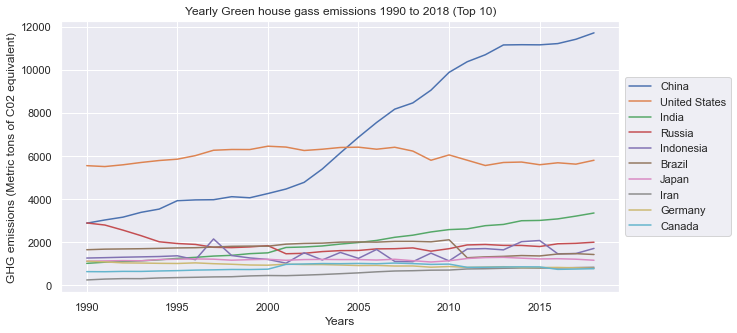

In [19]:
# Remove World and EU from list as not countries

Unwanted_Non_Country = {'World', 'European Union (27)'}
Top_10_GHG = [ele for ele in Top_10_GHG if ele not in Unwanted_Non_Country]

# Graph the trend of GHG emissions for the top 10 Countries

Top10_GHG_Graph = df_GHG.plot(y=Top_10_GHG, xlabel ="Years", ylabel = "GHG emissions (Metric tons of C02 equivalent)", title ="Yearly Green house gass emissions 1990 to 2018 (Top 10)")
Top10_GHG_Graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [20]:
# Looking at the above graph we see China has been increasing much faster than any other country in the top 10. India is increasing too. The remaining top 10 look to have stayed relatively stable

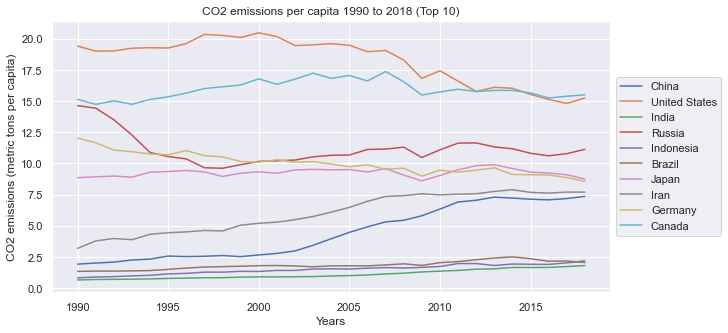

In [21]:
# We will now  review the Top 10 countries looking at C02 per Capita

# Iran and Russia had to be renamed in the C02 dataframe.
df_C02PerCap.rename(columns={'Iran, Islamic Rep.': "Iran",'Russian Federation':'Russia'},inplace=True)

# Graph the C02 per capita of the Top 10
Top_10_C02_Graph_v2 = df_C02PerCap.plot(y=Top_10_GHG, xlabel ="Years", ylabel = "CO2 emissions (metric tons per capita)", title ="CO2 emissions per capita 1990 to 2018 (Top 10)")
Top_10_C02_Graph_v2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [22]:
# From this graph we can see that China is still increasing per capita, however it is still much lower than USA and Canada who are the top 2.

In [23]:
# For a better look we will see exactly who has increased or decreased their emissions from 1990 to 2018
df_GHG.loc["1990_to_2018"] = df_GHG.loc["2018"]-df_GHG.loc["1990"]

In [24]:
# I got the list of the variances from 1990 to 2018 of the top 10 countries. A list was easier to manage for the bar chart.

Top_10_Value_List = df_GHG.loc[["1990_to_2018"], Top_10_GHG].values.tolist()
Top_10_Value_List = [Top_10_Value_List for sublist in Top_10_Value_List for Top_10_Value_List in sublist]
print(Top_10_Value_List)

[8832.099999999999, 250.8800000000001, 2337.19, -893.04, 446.76, -221.71000000000004, 45.350000000000136, 587.8000000000001, -332.66999999999996, 137.08000000000004]


[Text(0.5, 0, 'Top 10 Countrys'),
 Text(0, 0.5, 'Increase or decrease from 1990'),
 Text(0.5, 1.0, 'Increase or decrease of yearly GHG emissions from 1990 to 2018')]

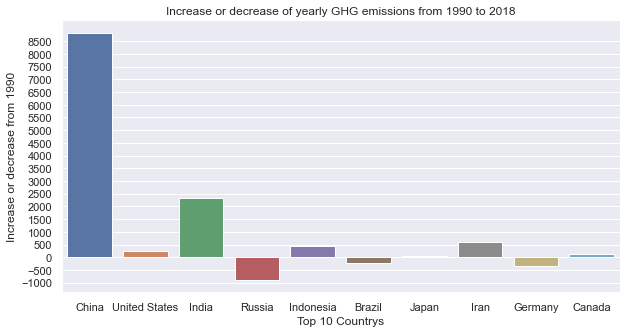

In [25]:
# Bar chart of variance of GHG from 2019 tp 2018

Bar_Graph = sns.barplot(x= Top_10_GHG, y = Top_10_Value_List)
Bar_Graph.yaxis.set_ticks(np.arange(-1000, 9000, 500))
Bar_Graph.set(xlabel ="Top 10 Countrys", ylabel = "Increase or decrease from 1990", title ="Increase or decrease of yearly GHG emissions from 1990 to 2018")

In [26]:
# Looking at the graph, China have increased their Green House Gass emissions considerably more than anyone else


[Text(0.5, 0, 'Top 10 Countrys'),
 Text(0, 0.5, 'Increase or decrease from 1990'),
 Text(0.5, 1.0, 'Increase or decrease of yearly C02 per Capita emissions from 1990 to 2018')]

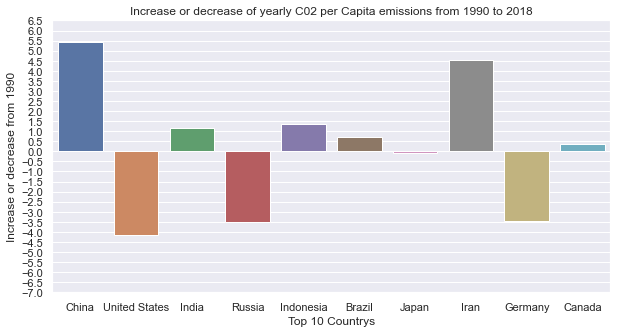

In [27]:
# Lets now review the same chart with C02 Per Capita
df_C02PerCap.loc["1990_to_2018"] = df_C02PerCap.loc["2018"]-df_C02PerCap.loc["1990"]


# Values to list like above
Top_10_Value_List_C02 = df_C02PerCap.loc[["1990_to_2018"], Top_10_GHG].values.tolist()
Top_10_Value_List_C02 = [Top_10_Value_List_C02 for sublist in Top_10_Value_List_C02 for Top_10_Value_List_C02 in sublist]

# Bar chart

Bar_Graph_C02 = sns.barplot(x= Top_10_GHG, y = Top_10_Value_List_C02)
Bar_Graph_C02.yaxis.set_ticks(np.arange(-7, 7, .5))
Bar_Graph_C02.set(xlabel ="Top 10 Countrys", ylabel = "Increase or decrease from 1990", title ='Increase or decrease of yearly C02 per Capita emissions from 1990 to 2018')

In [28]:
# Looking at the graph, China and Iran have increased their C02 per Capita more than the rest of the top 10. USA, Russa, and Germany have reduced their C02 per Capita